# Обзор возможностей OpenCV

OpenCV — библиотека компьютерного зрения и машинного обучения с открытым исходным кодом. Библиотека имеет интерфейсы на различных языках: Java, C++, Matlab и, конечно, Python.

<a href='https://readthedocs.org/projects/opencv-python-tutroals/downloads/pdf/latest/' target='_blank'>Здесь</a> можно ознакомиться с официальной документацией и примерами.

## Установка OpenCV

In [1]:
!pip install opencv-python==4.4.0.42

  Using cached opencv-python-4.4.0.42.tar.gz (88.9 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


После успешной установки, перезагрузите ядро и убедитесь, что используется версия 4.4.0

In [2]:
import cv2
print('OpenCV version:', cv2.__version__)

OpenCV version: 4.9.0


_P.s.: Установить версию 4.4.0 не удалось, однако при текущей - результаты получаются корректные._

## Палитра, каналы

Для отображения изображений в блокноте, будем использовать библиотеку matplotlib:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим изображение:

In [4]:
path = '/content/'
file_name = 'alisa-olaivar-5bjgzAPKzpI-unsplash.jpg'

С помощью команды `cv2.imread()` выполним чтение изображения:

In [5]:
img = cv2.imread(path + file_name)

Объект img является массивом типа ndarray, что позволяет с легкостью выполнять различные операции с ним и, как следствие, с изображением. Рассмотрим его структуру:

In [6]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(3372, 5097, 3)


Итак, размерность массива (3372, 5097, 3). Первые два числа отвечают за разрешение изображения. Первое число, `3372` — высота изображения в пикселях (или количество строк в массиве), второе число, `5097` — ширина (или количество столбцов). Третье значение указывает на информацию, которая содержится о каждом пикселе. В данном случае (для цветного изображения в формате RGB) мы имеем дело с интенсивностью соответствующих каналов.

Давайте выведем изображение, хранимое в виде массива, на экран. Для этого используем команду `imshow()`:

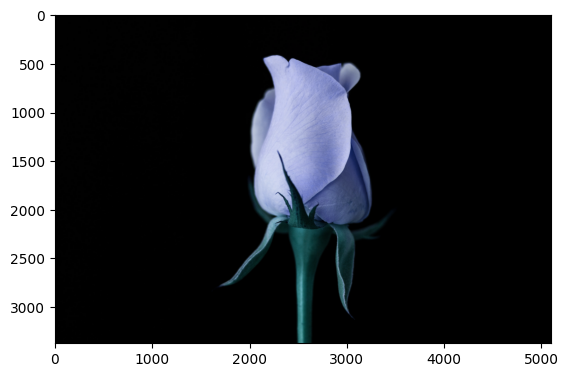

In [7]:
plt.imshow(img)
plt.show()

Если сравнить исходное изображение и то, что отобразилось выше, можно заметить некоторое несоответствие по цветам.

<b>Важно!</b> Отметим на этом этапе два важных замечания.  
Во-первых, изображение по умолчанию представляется **в обратной палитре BGR**, а не привычной RGB. Для корректного отображения, необходимо поменять каналы R и B местами.  
Во-вторых, разрешение изображения считается **от верхнего левого угла** (можно заметить соответствующую систему координат).

Поменять каналы R и B можно вручную, но куда проще воспользоваться следующей встроенной функцией:

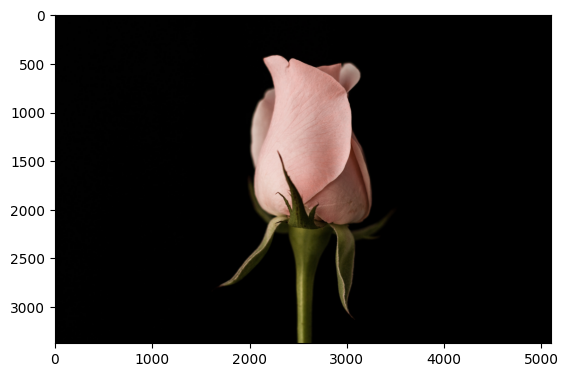

In [8]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

Большинство команд, возвращает кортеж значений, так что для удобства рекомендуем пользоваться следующим синтаксисом:

In [9]:
h, w, c = img.shape
print('Width:  ', w)
print('Height: ', h)
print('Channels:', c)

Width:   5097
Height:  3372
Channels: 3


In [10]:
B, G, R = img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


И не забывайте, в какой палитре сохранено изображение, так как это влияет на порядок значений!

In [11]:
R, G, B = RGB_img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


Обращаясь к определенным каналам пикселей, мы можем изменить их интенсивность. Например обнулить каналы R и B:

In [12]:
import numpy as np

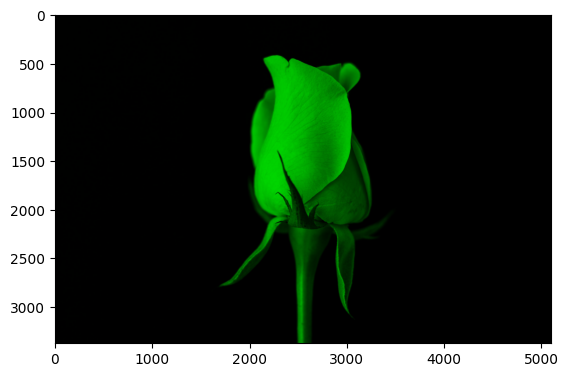

In [13]:
green_img = RGB_img.copy()

green_img[:, :, 0] = 0
green_img[:, :, 2] = 0

plt.imshow(green_img)
plt.show()

Или установить интенсивность канала R для всех пикселей, равной 250:

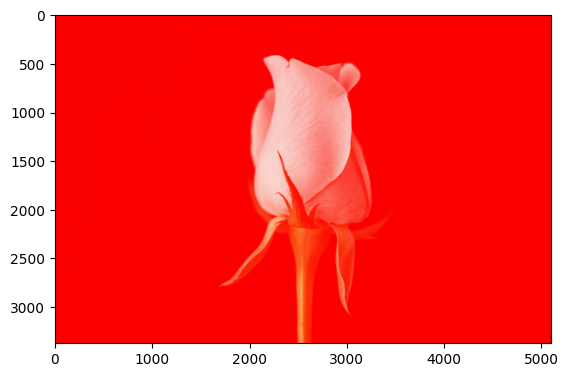

In [14]:
red_intense_img = RGB_img.copy()

red_intense_img[:, :, 0] = 250

plt.imshow(red_intense_img)
plt.show()

## Изменение изображения (обрезка, сжатие, вращение)

Так как изображение представляет собой массив, то для операции обрезки изображения достаточно просто обратиться к нужному диапазону пикселей.

Следущий код выделяет область изображения с 300 по 3200 пиксель по вертикали (не забывайте, что 0 находится сверху, а нумерация начинается с нуля) и с 1500 по 3500 по горизонтали:

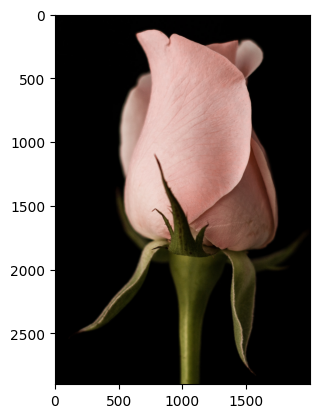

In [15]:
crop_img = RGB_img[300:3200, 1500:3500]
plt.imshow(crop_img)
plt.show()

Для масштабирования или сжатия изображения можно воспользоваться функцией resize(), которая в качестве параметров принимает исходное изображение и новую размерность в пикселях. Кроме того, можно указать алгоритм преобразования. Ознакомиться с различными алгоритмы и математикой, скрытой за ними, можно в <a href='https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html' target='_blank'>документации</a>.

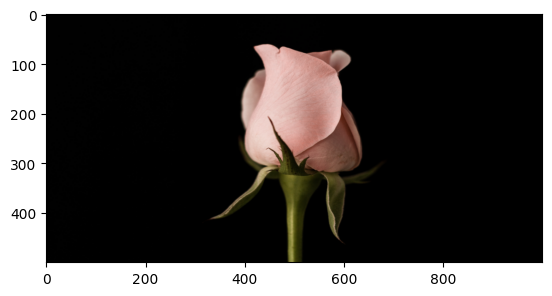

In [16]:
dim = (1000, 500)
resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

Размеры изображения изменены на 1000 пикселей в ширину и 500 пикселей в высоту, что конечно привело к нарушению пропорций.
Для сохранения пропорций следует найти отношение исходных сторон:

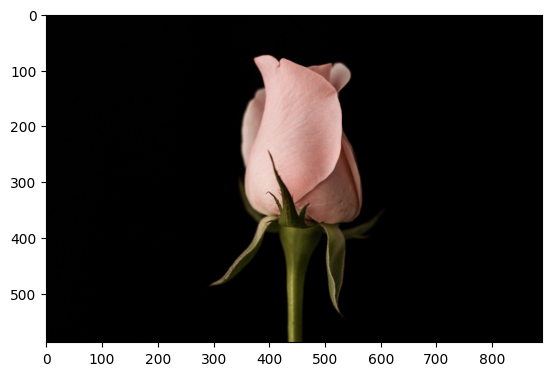

In [17]:
h, w, c = RGB_img.shape
new_width = 890

k = float(w) / h
dim = (new_width, int(new_width / k))

resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

И, наконец, последнее базовое преобразование — поворот изображения. Для этого необходимо создать матрицу поворота на заданный угол. Положительным значениям соответствует поворот против часовой стрелки, отрицательным — по часовой. Поворот, конечно же, задается относительной некоторой точки.

Повернем изображение на 45 градусов по часовой стрелке относительно (почти) центра. За создание матрицы поворота отвечает функция `getRotationMatrix2D()`, а за преобразование — функция `warpAffine()`.

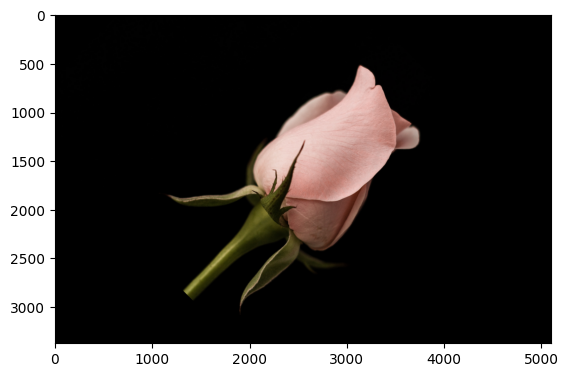

In [18]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

Во время поворота можно масштабировать изображение, за это отвечает последний параметр функции `getRotationMatrix2D()`.

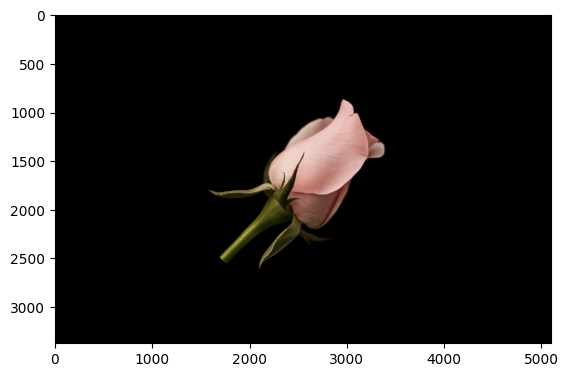

In [19]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 0.7)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

## Еще о палитрах

Мы уже немного поговорили о палитрах и научились преобразовывать изображения из BGR в RGB. Полезной палитрой при реализации моделей компьютерного зрения является серая шкала (градации серого). Такая шкала передает 256 оттенков серого цвета, или яркости (значение 0 представляет черный цвет, а значение 255 — белый).

Для преобразования из формата BGR воспользуемся методом `COLOR_BGR2GRAY`:

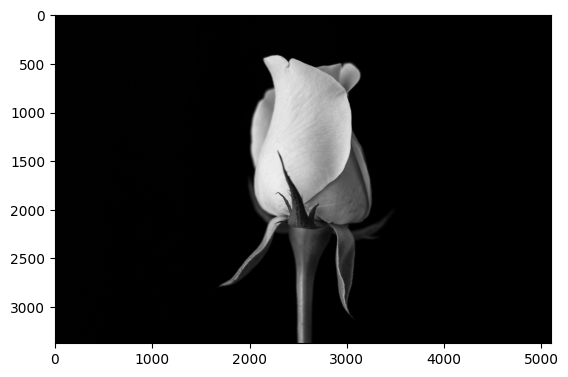

In [20]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

Забегая несколько вперед, такая палитра полезна в контексте определения границ объектов. Например, с помощью функции `threshold`, мы можем изменить интенсивность пикселей, которые темнее (меньше) некоторого порога и, соответственно, ярче (больше).

Например, заменим все пиксели темнее, чем 127, на 0, а все, которые ярче 127, —
на 255.

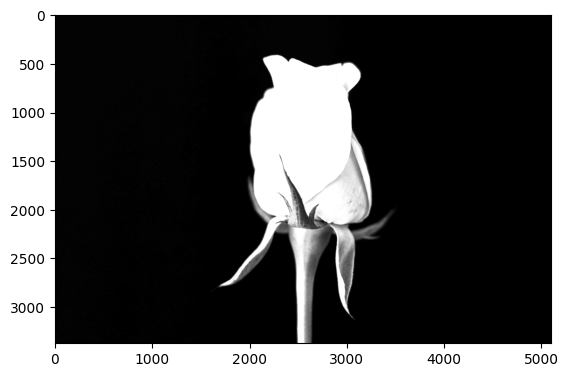

In [21]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, 10)
plt.imshow(thresh_image, cmap='gray')
plt.show()

В итоге, цветок имеет очень четкую границу с фоном, и может быть в последствии определен на изображении.

Ниже приведем еще некоторые примеры:

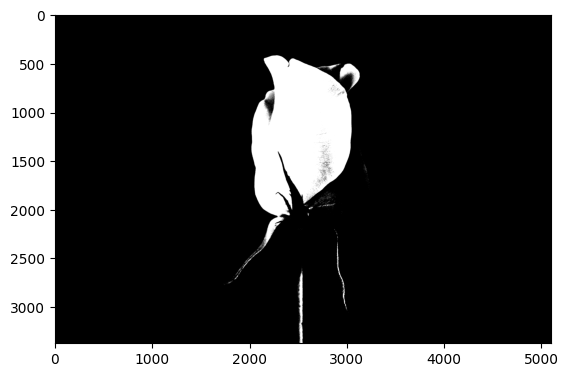

In [22]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_image, cmap='gray')
plt.show()

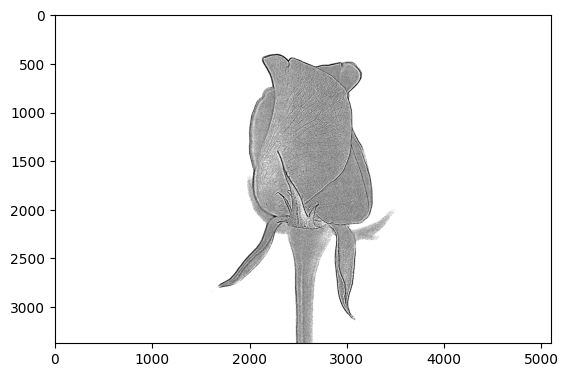

In [23]:
th2 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th2, cmap='gray')
plt.show()

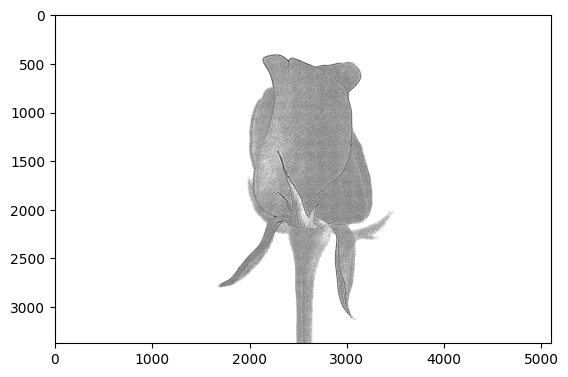

In [24]:
th3 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th3, cmap='gray')
plt.show()

## Сохранение изображений

Все созданные изображения, конечно, можно сохранить, для этого воспользуемся командой `imwrite()`. В качестве параметров указываем путь с именем файла и переменную, в которой хранится изображение:

In [25]:
path = '/content/results/'
file_name = 'gray_image.jpg'

cv2.imwrite(path + file_name, gray_image)

True

Также обращаем внимание, что при сохранении цветного изображения, функция imwrite() ожидает его в формате BGR.

In [26]:
path = '/content/results/'
file_name = 'temp_image.jpg'

cv2.imwrite(path + file_name, cv2.cvtColor(RGB_img, cv2.COLOR_RGB2BGR))

True

# Индивидуальное задание

_Задание 1_
1. С помощью библиотеки OpenCV считайте изображение:

2. Определите разрешение изображения.

    _Введите ширину изображения в пикселях:_
    ```
    6000
    ```
    
    _Введите высоту изображения в пикселях:_
    ```
    4000
    ```
    
3. Определите интенсивность каналов R,G,B для пикселя, находящегося на пересечении 1968 строки и 2968 столбца матричного представления изображения.

    _Введите значения интенсивности через запятую для каналов R,G,B соответственно. Значения введите через запятую, например: 25,25,25 или 25, 25, 25:_
    ```
    122,126,93
    ```


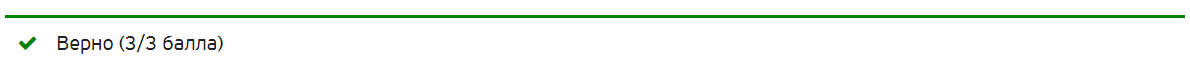

_Задание 2_  
1. С помощью библиотеки OpenCV считайте изображение.

2. Преобразуйте в палитру RGB.

3. Выделите подматрицу пикселей, находящихся на пересечении строк в диапазоне от `1800` до `2289` включительно, и столбцов в диапазоне от `2690` до `3339` включительно, матричного представления изображения.  

    _Введите идентификатор изображения (расположенный в левом верхнем углу представленных выше изображений):_
    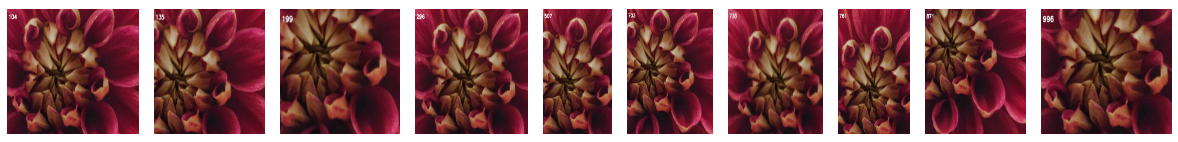  
    ```
    199
    ```

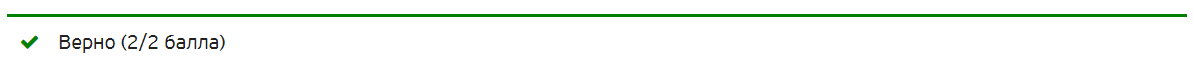

_Задание 3_  
1. С помощью библиотеки OpenCV считайте изображение.

2. Сожмите изображение до ширины `890`, соблюдая пропорции исходного изображения.  
    **Важно:** коэффициент отношения сторон при вычислениях **не округляйте**. Если высота не окажется целой, округлите значение до целого **в меньшую сторону**.

    _Введите коэффициент отношения исходной ширины изображения к его высоте. Ответ введите с точностью до тысячных, однако для вычисления высоты используйте точное значние:_
    ```
    1.778
    ```

    _Введите высоту полученного изображения:_
    ```
    500
    ```

3. Сохраните сжатое изображение в палитре RGB.

    _Введите размер сжатого изображения в байтах:_
    ```
    99808
    ```

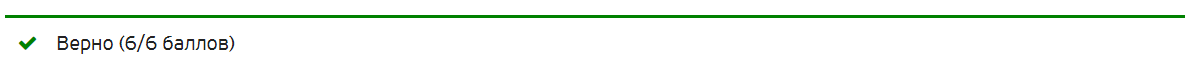

In [27]:
# Задание 1
image = cv2.imread('/content/sven-hornburg-TAVB-2C6uyE-unsplash.jpg')

height, width, _ = image.shape
print(f'Ширина: {width} пикселей')
print(f'Высота: {height} пикселей')

pixel_row = 1968
pixel_col = 2968
b, g, r = image[pixel_row, pixel_col]
print(f'Интенсивность каналов R, G, B: {r},{g},{b}')

Ширина: 6000 пикселей
Высота: 4000 пикселей
Интенсивность каналов R, G, B: 122,126,93


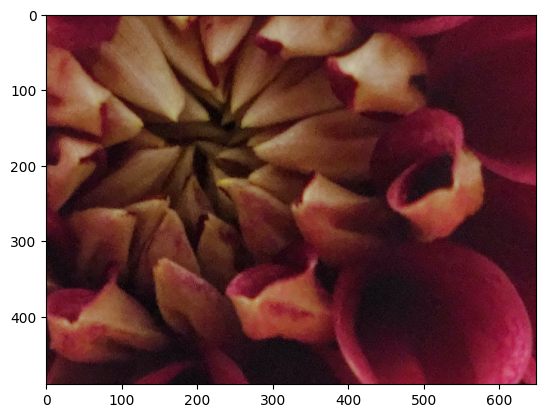

In [28]:
# Задание 2
image = cv2.imread('/content/dan-lazar-Iw7mpSiYwgs-unsplash.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

submatrix = image_rgb[1799:2289, 2689:3339]

plt.imshow(submatrix)
plt.show()

In [29]:
# Задание 3
import math
import os

In [30]:
img_path = '/content/danist-gIrvhDFuDn0-unsplash.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape
new_width = 890
k = w / h
new_height = math.floor(new_width / k)
dim = (new_width, new_height)
resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print(f"Коэффициент отношения исходной ширины изображения к его высоте: {k:.3f}")
print(f"Высота полученного изображения: {new_height}")

resized_RGB_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
path = '/content/'
file_name = 'final7778.jpg'
cv2.imwrite(path + file_name, resized_RGB_img)


file_size = os.path.getsize(path + file_name)
print(f"Размер сжатого изображения в байтах: {file_size}")

Коэффициент отношения исходной ширины изображения к его высоте: 1.778
Высота полученного изображения: 500
Размер сжатого изображения в байтах: 99808
